In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR_Analytics.csv")
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [3]:
# Change the column name from 'sales' to 'Department' because that column have same value(sales)
df=df.rename(columns={'sales':'Department'})
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
#colum 'job' & 'salary' encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Department']= le.fit_transform(df['Department'])
#df['salary']= le.fit_transform(df['salary'])

df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)  
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,8,0
14995,0.37,0.48,2,160,3,0,1,0,8,0
14996,0.37,0.53,2,143,3,0,1,0,8,0
14997,0.11,0.96,6,280,4,0,1,0,8,0
14998,0.37,0.52,2,158,3,0,1,0,8,0


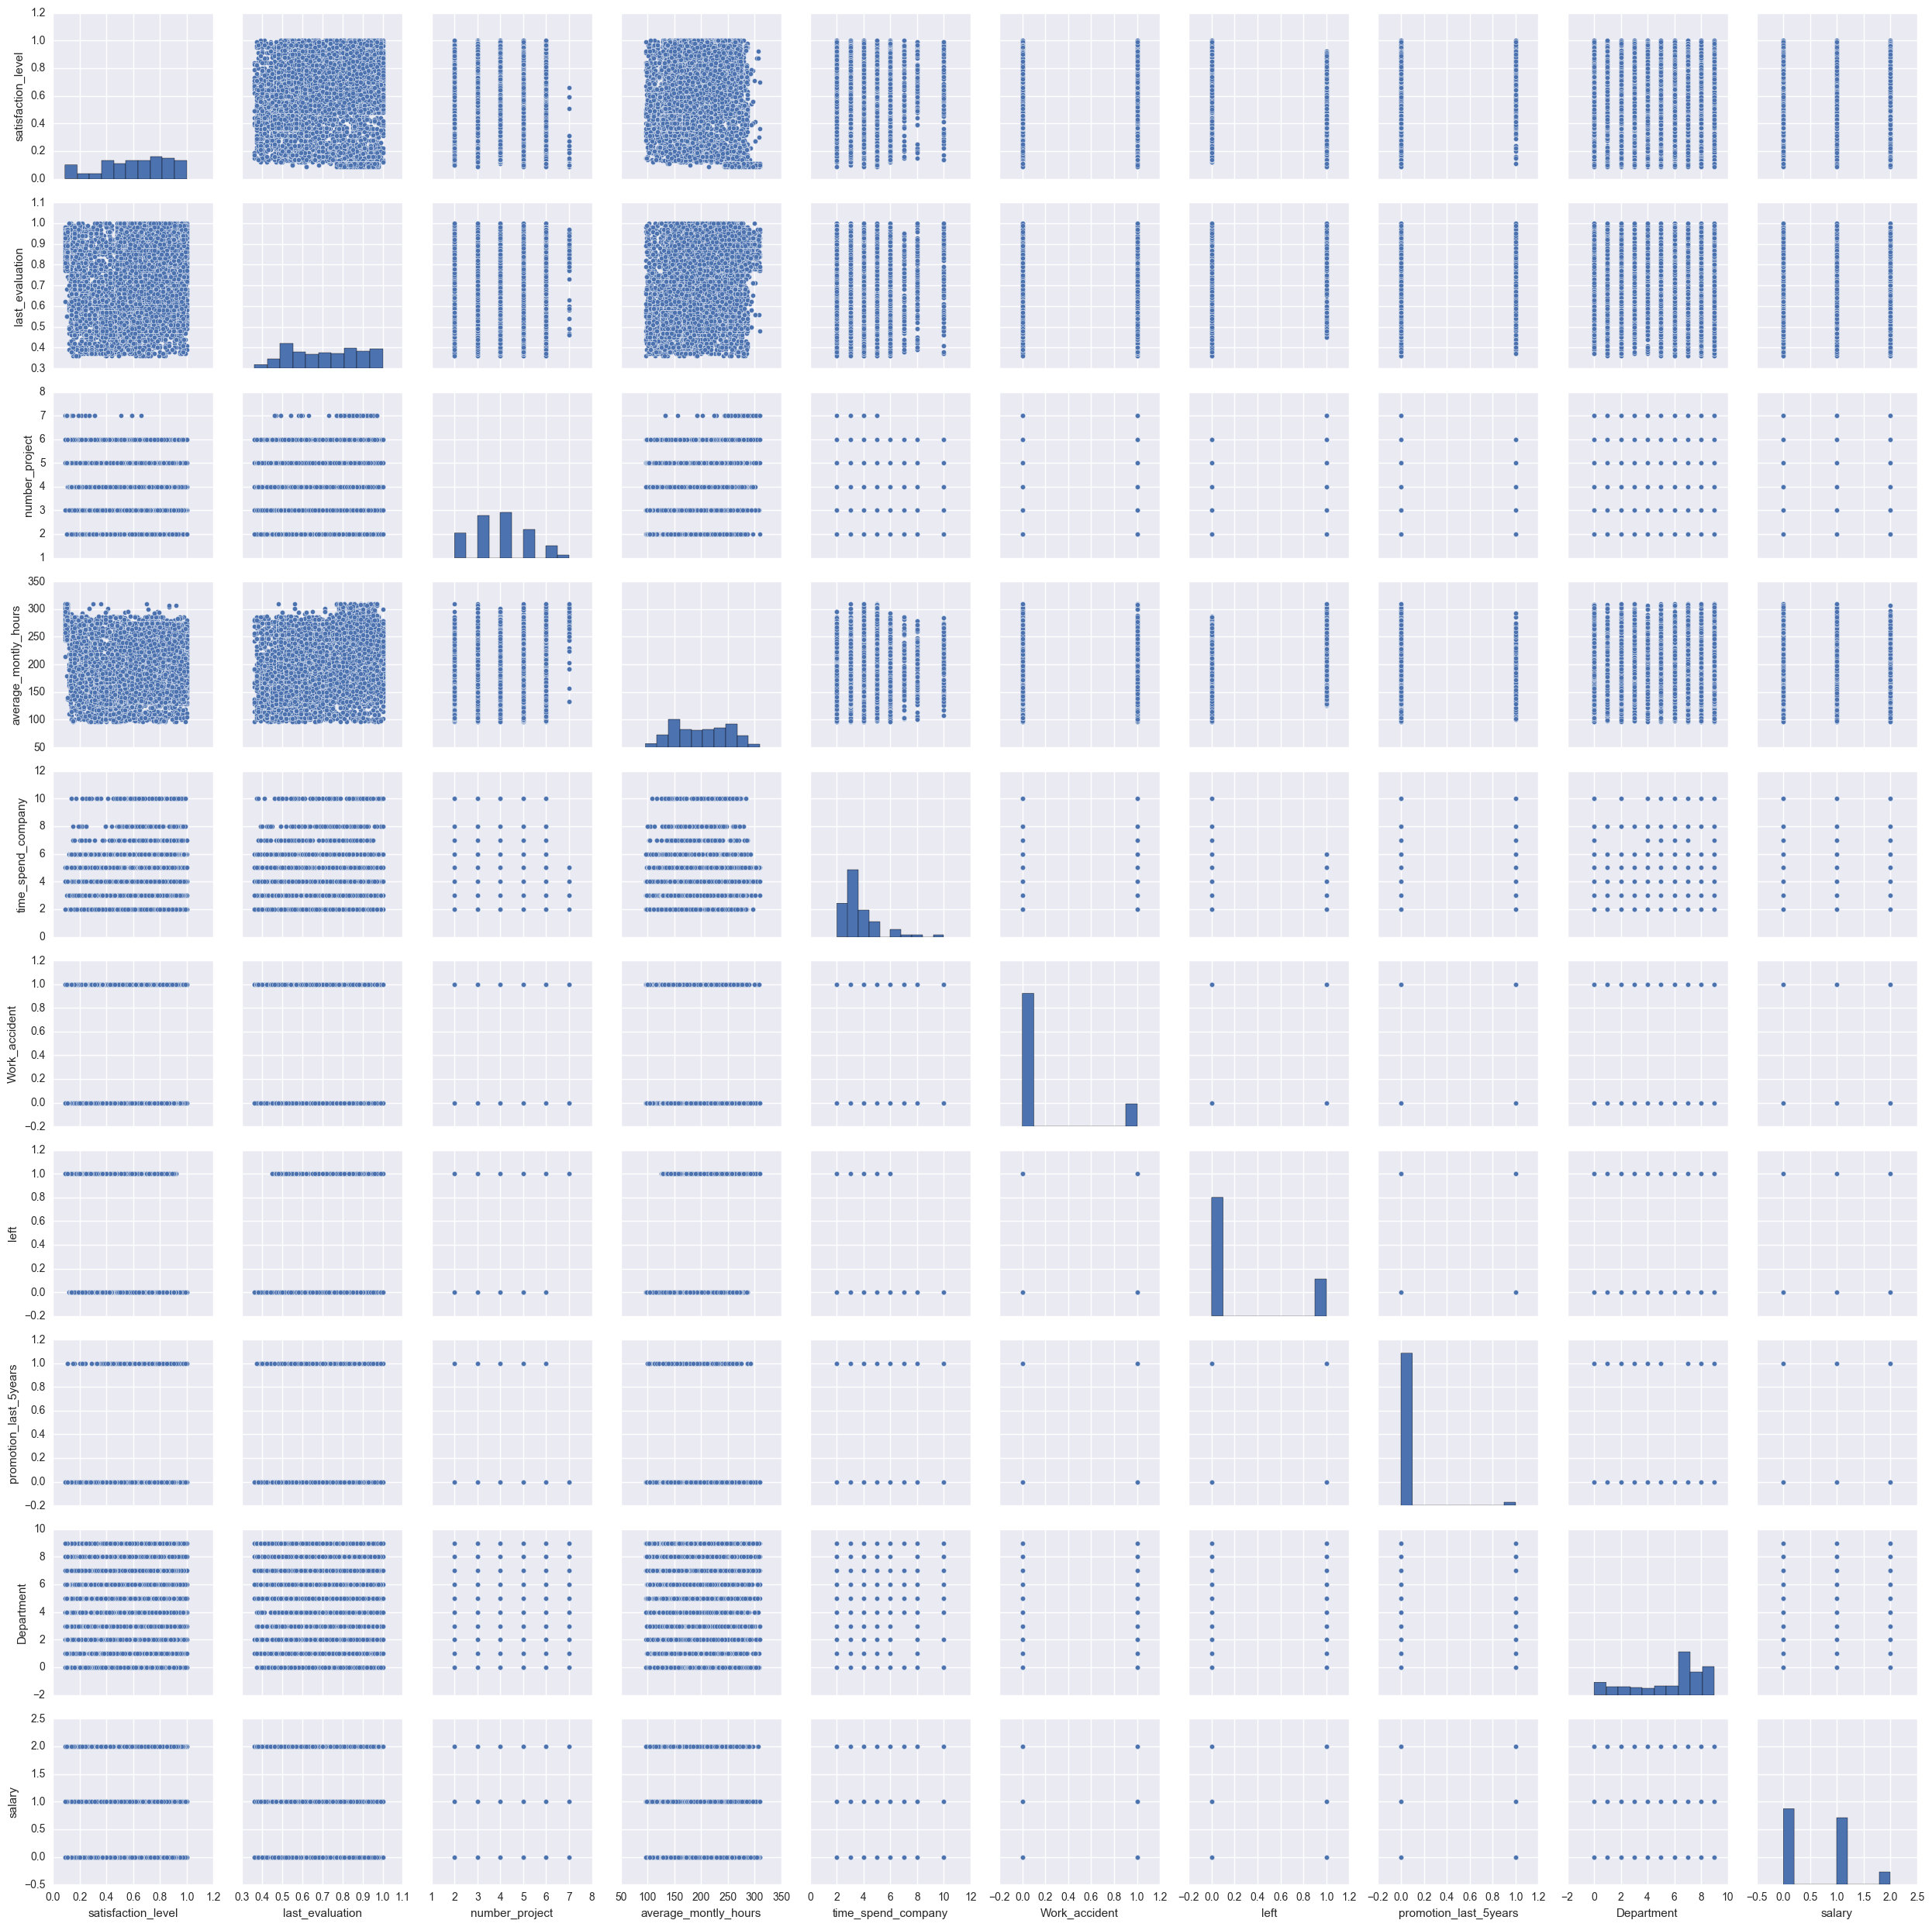

In [22]:
sns.pairplot(df)
plt.show()

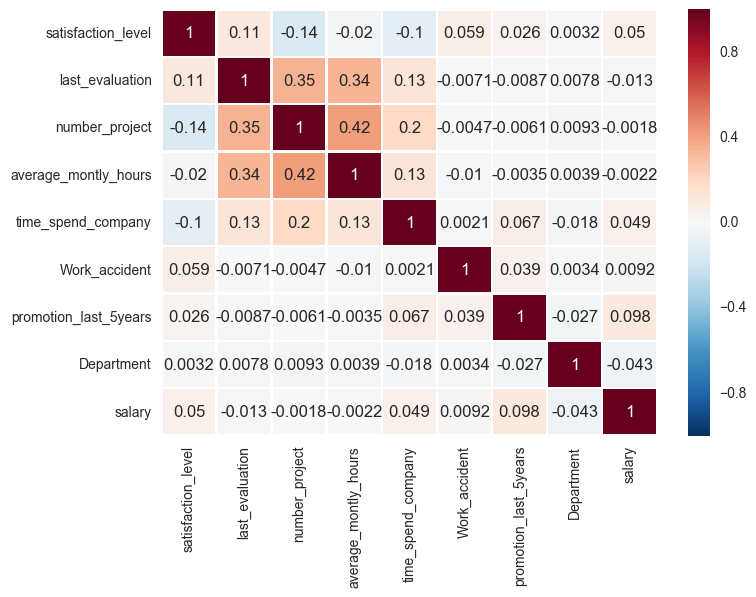

In [23]:
df1 = df.drop('left',1)
corr_data = pd.DataFrame.corr(df1)
sns.heatmap(corr_data, annot=True, linewidths=1)
plt.show()

- feature간의 다중공선성이 적음

Feature ranking:
1. feature 0 (0.274515)
2. feature 2 (0.234442)
3. feature 4 (0.171028)
4. feature 3 (0.139046)
5. feature 1 (0.125374)
6. feature 7 (0.019887)
7. feature 8 (0.017474)
8. feature 5 (0.015668)
9. feature 6 (0.002567)


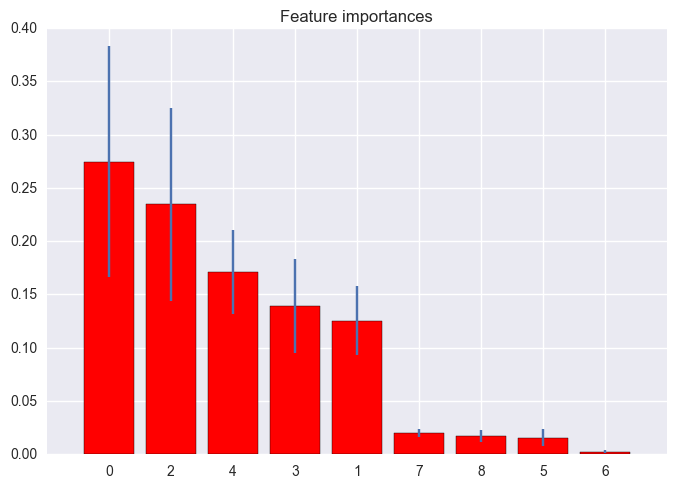

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop('left', 1)
y = df['left']
forest = ExtraTreesClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

- 독립 변수의 중요도 계산하기 위해 랜덤 포레스트 이용
- 포레스트 안에서 사용된 모든 노드에 대해 IG를 구할 수 있으므로 IG의 평균을 비교하면 어떤 독립변수가 중요한지를 비교할 수 있다.
- satisfaction_level => number_project => time_spend_company => average_montly_hours => last_evaluation => Department => work_accident => salary  => promotion_last_5years 순서로 직장을 떠나는 것에 영향을 미침
- 흥미로운 점은 salary가 이직률에 큰영향을 미치지 않은 것임

#### 중요 변수 3개와 left 간의 관계

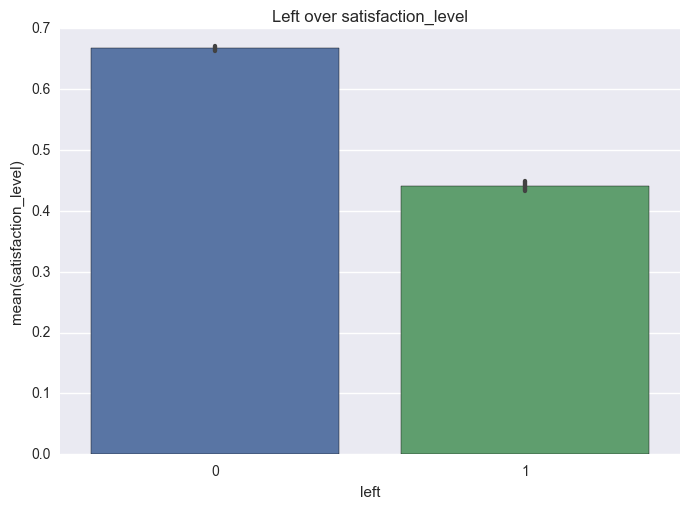

In [16]:
sns.barplot(x = 'left', y = 'satisfaction_level', data = df)
sns.plt.title('Left over satisfaction_level')
#sns.barplot(df['left'], df['satisfaction_level'])
plt.show()

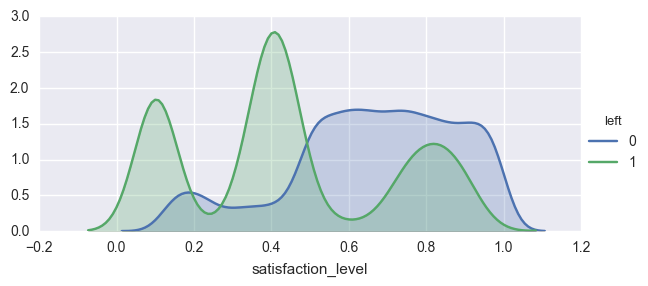

In [41]:
facet = sns.FacetGrid(df, hue="left",aspect=2)
facet = (facet.map(sns.kdeplot,'satisfaction_level', shade = True).add_legend())
plt.show()

- 만족도가 높을 수록 직장을 떠나는 비중이 낮음
- 만족도가 0.1, 0.4, 0.8일때 떠나는 비중이 높음

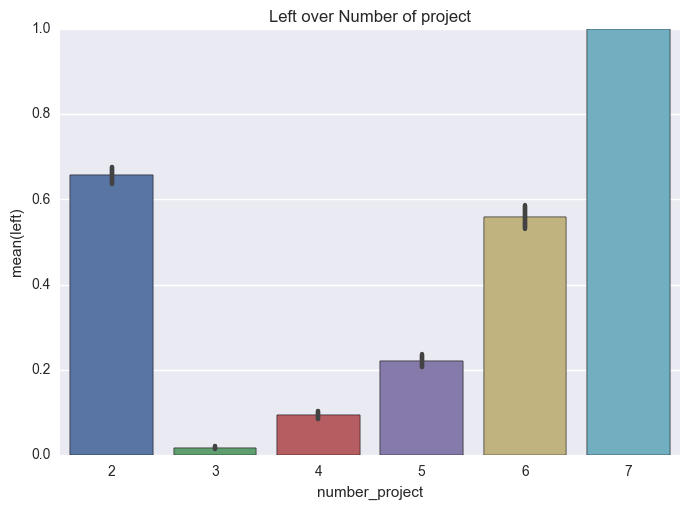

In [11]:
sns.barplot(x = 'number_project', y = 'left', data = df)
sns.plt.title('Left over Number of project')
plt.show()

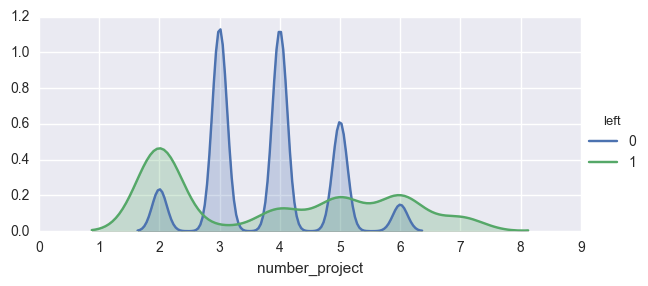

In [13]:
facet = sns.FacetGrid(df, hue="left",aspect=2)
facet = (facet.map(sns.kdeplot,'number_project', shade = True).add_legend())
plt.show()

- 프로젝트 수가 7일 때 이직률이 100%이다.
- 직원들에게 프로젝트 수를 맡길 때 3~4개가 적당한 것으로 보여진다.

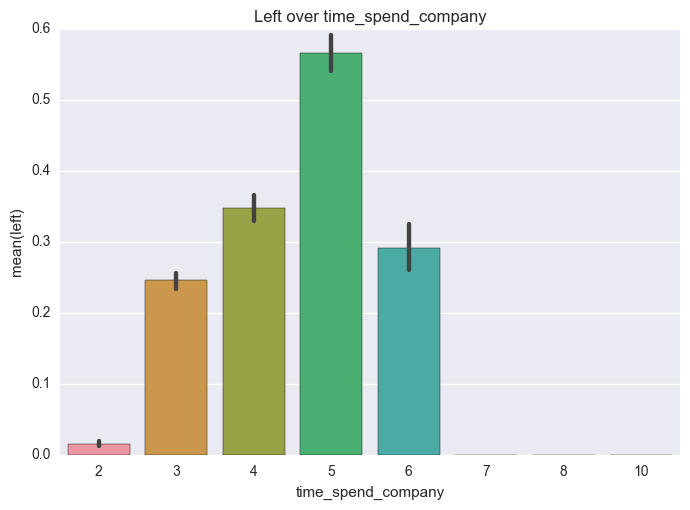

In [20]:
sns.barplot(x = 'time_spend_company', y = 'left', data = df)
sns.plt.title('Left over time_spend_company')
#sns.barplot(df['left'], df['satisfaction_level'])
plt.show()

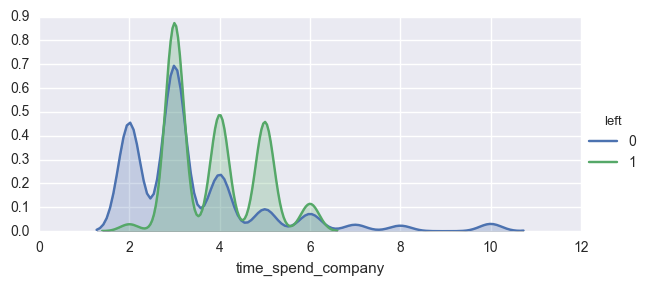

In [19]:
facet = sns.FacetGrid(df, hue="left",aspect=2)
facet = (facet.map(sns.kdeplot,'time_spend_company', shade = True).add_legend())
plt.show()

- 회사에 오래 남아 있는 사람일 수록(7시간 이상) 이직률이 낮음

- 나머지 feature들 중 흥미로웠던 점들

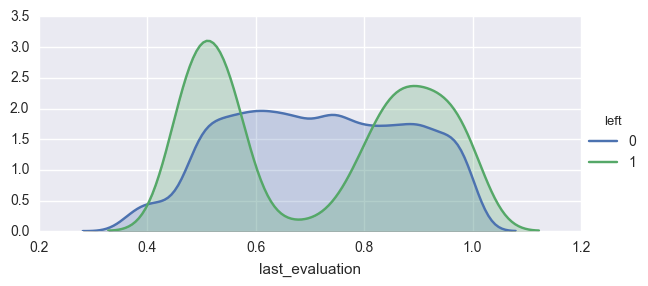

In [33]:
facet = sns.FacetGrid(df, hue="left",aspect=2)
facet = (facet.map(sns.kdeplot,'last_evaluation', shade = True).add_legend())
plt.show()

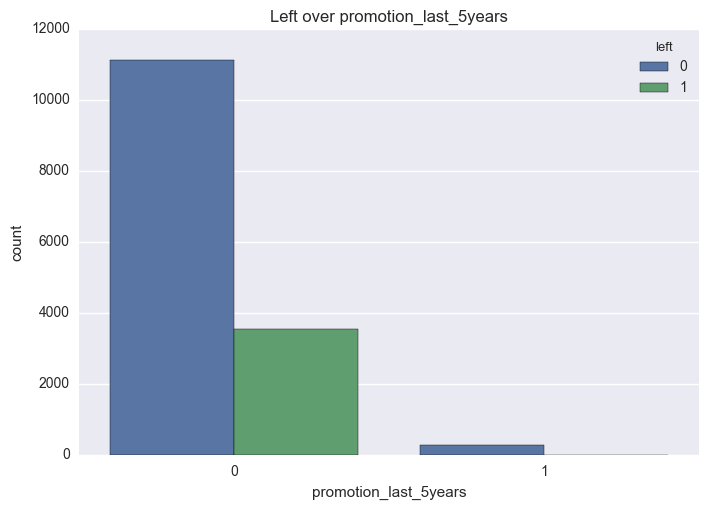

In [34]:
sns.countplot(x='promotion_last_5years', hue="left", data = df)
sns.plt.title('Left over promotion_last_5years')
plt.show()

- 지난 5년간 promotion을 한 사람들중 퇴사를 한 사람은 없었다.

### ML

- Train, Test split

In [37]:
from sklearn.model_selection import train_test_split
y = df['left']
X = df.drop('left',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42 )

- Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_score_train = logistic.score(X_train, y_train)
print "Train Score : ", logistic_score_train
logistic_score_test = logistic.score(X_test, y_test)
print "-" * 40
print "Test Score : ", logistic_score_test

Train Score :  0.795601552393
----------------------------------------
Test Score :  0.786464646465


- SVM

In [39]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_score_train = svm.score(X_train, y_train)
print "Train Score : ", svm_score_train
svm_score_test = svm.score(X_test, y_test)
print "-" * 40
print "Test Score : ", svm_score_test

Train Score :  0.96347895313
----------------------------------------
Test Score :  0.947474747475


- Decision tree

In [40]:
from sklearn import tree
decision = tree.DecisionTreeClassifier()
decision.fit(X_train, y_train)
decision_score_train = decision.score(X_train, y_train)
print "Train score : ",decision_score_train
decision_score_test = decision.score(X_test, y_test)
print "-" * 40
print "Test score : ",decision_score_test

Train score :  1.0
----------------------------------------
Test score :  0.971313131313


- Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train, y_train)
random_score_train = random.score(X_train, y_train)
print "Training score : ",random_score_train
random_score_test = random.score(X_test, y_test)
print "-" * 40
print "Testing score : ",random_score_test

Training score :  0.997810727436
----------------------------------------
Testing score :  0.985454545455


### Model comparing

In [45]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
        'Train_Score' : [logistic_score_train, svm_score_train, decision_score_train, random_score_train],
        'Test_Score'  : [logistic_score_test, svm_score_test, decision_score_test, random_score_test]
    })
models.sort_values(by='Test_Score', ascending=True)

,Model,Test_Score,Train_Score
0,Logistic Regression,0.786465,0.795602
1,SVM,0.947475,0.963479
2,Decision Tree,0.971313,1.000000
3,Random Forest,0.985051,0.998209
